In [1]:
!pip install kneed

In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# 1. Відкрити та зчитати наданий файл з даними.

In [46]:
temp_df = pd.read_csv('dataset3_l5.csv')
temp_df

Cement (component 1)(kg in a m^3 mixture);Blast Furnace Slag (component 2)(kg in a m^3 mixture);Fly Ash (component 3)(kg in a m^3 mixture);Water  (component 4)(kg in a m^3 mixture);Superplasticizer (component 5)(kg in a m^3 mixture);Coarse Aggregate  (component 6)(kg in a m^3 mixture);Fine Aggregate (component 7)(kg in a m^3 mixture);Age (day);Concrete compressive strength(MPa  \
540 0 ;0   0 ;0   0 ;162 0 ;2  5 ;1040 0 ;676                                          0 ;28 ;79                                                                                                                                                                                                                                                                                                                                            
                               5 ;1055 0 ;676                                          0 ;28 ;61                                                                                                                                                                                                                                                                                                                                            
332 5 ;142 5 ;0   0 ;228 0 ;0  0 ;932  0 ;594                                         0 ;270 ;40                                                                                                                                                                                                                                                                                                                                            
                                       0 ;594                                         0 ;365 ;41                                                                                                                                                                                                                                                                                                                                            
198 6 ;132 4 ;0   0 ;192 0 ;0  0 ;978  4 ;825                                         5 ;360 ;44                                                                                                                                                                                                                                                                                                                                            
...                                                                                          ...                                                                                                                                                                                                                                                                                                                                            
276 4 ;116 0 ;90  3 ;179 6 ;8  9 ;870  1 ;768                                          3 ;28 ;44                                                                                                                                                                                                                                                                                                                                            
322 2 ;0   0 ;115 6 ;196 0 ;10 4 ;817  9 ;813                                          4 ;28 ;31                                                                                                                                                                                                                                                                                                                                            
148 5 ;139 4 ;108 6 ;192 7 ;6  1 ;892  4 ;780                                          0 ;28 ;23                                                                                         

Як бачимо, при зчитуванні датасету отримуємо досить неочікуваний результат. Справа в тому, що оригінальний csv-файл не був приведений до охайного вигляду. Назви атрибутів збиті в дві клітинки, а значення атрибутів у записах некоректним чином вписані у комірки. Для того щоб позбавитися цього недоліку, оскільки pandas.read_csv зчитує csv-файл рядок за рядком, то достатньо при зчитуванні датасету вказати аргумент delimeter=';', оскільки значення в датасеті розділені саме цим роздільним символом: 

In [47]:
df = pd.read_csv('dataset3_l5.csv', delimiter=';')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,"540,0","0,0","0,0","162,0","2,5","1040,0","676,0",28,"79,99"
1,"540,0","0,0","0,0","162,0","2,5","1055,0","676,0",28,"61,89"
2,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",270,"40,27"
3,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",365,"41,05"
4,"198,6","132,4","0,0","192,0","0,0","978,4","825,5",360,"44,30"
...,...,...,...,...,...,...,...,...,...
1025,"276,4","116,0","90,3","179,6","8,9","870,1","768,3",28,"44,28"
1026,"322,2","0,0","115,6","196,0","10,4","817,9","813,4",28,"31,18"
1027,"148,5","139,4","108,6","192,7","6,1","892,4","780,0",28,"23,70"
1028,"159,1","186,7","0,0","175,6","11,3","989,6","788,9",28,"32,77"


Окрім того, варто звернути увагу на числові значення атрибутів у записах. Справа в тому, що в програмному середовищі за замовчуванням кома не може бути десятковим розділювачем. Тобто наші значення не є числовими: відповідні числові записи знаходяться у строковому форматі, або ж, іншими словами, мають тип object:

In [48]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                object
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    object
Fly Ash (component 3)(kg in a m^3 mixture)               object
Water  (component 4)(kg in a m^3 mixture)                object
Superplasticizer (component 5)(kg in a m^3 mixture)      object
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     object
Fine Aggregate (component 7)(kg in a m^3 mixture)        object
Age (day)                                                 int64
Concrete compressive strength(MPa, megapascals)          object
dtype: object

Приведемо відповідні значення до числового формату (float типу):

In [49]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace(',', '.').astype(float)
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# 2. Визначити та вивести кількість записів. 

In [50]:
print(f'Кількість записів: {len(df)}')

Кількість записів: 1030


# 3. 
Видалити атрибут ***Concrete compressive strength***.

In [51]:
previous_attributes = df.columns

In [52]:
print(f'Список атрибутів до видалення: \n{previous_attributes}')

Список атрибутів до видалення: 
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [53]:
for column in df.columns:
    if 'Concrete compressive strength' in column:
        df.drop(column, axis=1, inplace=True)

In [54]:
current_attributes = df.columns
deleted = list(set(previous_attributes) ^ set(current_attributes))

In [55]:
print(f'Видалені атрибути: \n{deleted}')

Видалені атрибути: 
['Concrete compressive strength(MPa, megapascals) ']


# 4. Вивести атрибути, що залишилися:

In [56]:
print(f'Список атрибутів після видалення: \n{current_attributes}')

Список атрибутів після видалення: 
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')


Датасет після видалення відповідних атрибутів:

In [57]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


# 5. 
Використовуючи функцію ***KMeans*** бібліотеки ***scikit-learn***, виконати розбиття набору даних на кластери з випадковою початковою ініціалізацією і вивести координати центрів кластерів.

Оптимальну кількість кластерів визначити на основі початкового набору даних трьома різними способами:
1) elbow method;

2) average silhouette method;

3) prediction strength method (див. *п. 9.2.3 Determining the Number of Clusters* книжки ***Andriy Burkov. The Hundred-Page Machine Learning Book***).

Отримані результати порівняти і пояснити, який метод дав кращий результат і чому так (на Вашу думку)

Text(0.5, 1.0, 'Elbow curve')

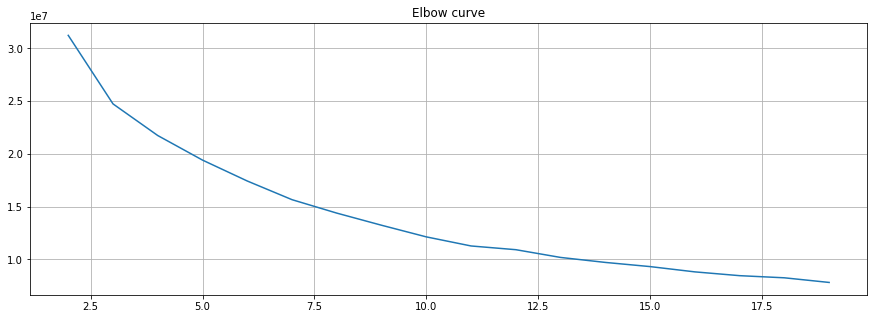

In [62]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# 6. 
За раніш обраної кількості кластерів багаторазово проведіть кластеризацію методом *k*-середніх, використовуючи для початкової ініціалізації метод *k*-means++.

Виберіть найкращий варіант кластеризації. Який кількісний критерій Ви обрали для відбору найкращої кластеризації?

# 7.
Використовуючи функцію ***AgglomertiveClustering*** бібліотеки ***scikit-learn***, виконати розбиття набору даних на кластери. Кількість кластерів обрати такою ж самою, як і на попередньому методі. Вивести координати центрів кластерів.

# 8.
Порівняти результати двох використаних методів кластеризації.